In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
matches = pd.read_csv('C:/Users/Hp/Desktop/WPL/matches.csv')
deliveries = pd.read_csv('C:/Users/Hp/Desktop/WPL/deliveries.csv')

In [3]:
all_matches = matches[(matches['team1'].isin(['Sunrisers Hyderabad', 'Delhi Capitals'])) & (matches['team2'].isin(['Sunrisers Hyderabad', 'Delhi Capitals']))]
data = pd.merge(matches, deliveries, how = "inner", left_on = 'id', right_on = 'match_id')
sub_data = data[(data['team1'].isin(['Sunrisers Hyderabad', 'Delhi Capitals'])) & (data['team2'].isin(['Sunrisers Hyderabad', 'Delhi Capitals']))]

### Who will win the match??

In [4]:
all_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
20,21,2017,Hyderabad,4/19/2017,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,15,0,KS Williamson,"Rajiv Gandhi International Stadium, Uppal",CB Gaffaney,NJ Llong,NaN
38,39,2017,Delhi,5/2/2017,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,6,Mohammed Shami,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN
393,394,2013,Delhi,4/12/2013,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,normal,0,Sunrisers Hyderabad,0,3,A Mishra,Feroz Shah Kotla,Aleem Dar,Subroto Das,NaN
427,428,2013,Hyderabad,5/4/2013,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,normal,0,Sunrisers Hyderabad,0,6,DJG Sammy,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,S Asnani,NaN
468,469,2014,NaN,4/25/2014,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN


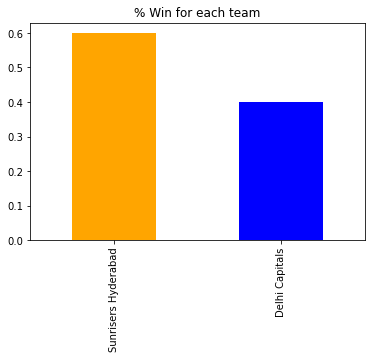

In [5]:
all_matches['winner'].value_counts(normalize=True).plot.bar(title='% Win for each team', color=['Orange', 'Blue'])

In [7]:
sub_data1.shape

(12, 18)

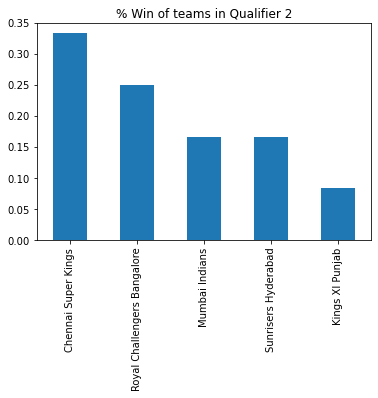

In [8]:
sub_data1['winner'].value_counts(normalize=True).plot.bar(title='% Win of teams in Qualifier 2')

In [9]:
sub_data1[(sub_data1['team1'].isin(['Sunrisers Hyderabad', 'Delhi Capitals'])) | (sub_data1['team2'].isin(['Sunrisers Hyderabad', 'Delhi Capitals']))]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
379,380,2012,Chennai,5/25/2012,Chennai Super Kings,Delhi Capitals,Delhi Capitals,field,normal,0,Chennai Super Kings,86,0,M Vijay,"MA Chidambaram Stadium, Chepauk",BR Doctrove,SJA Taufel,NaN
634,635,2016,Delhi,5/27/2016,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN
694,7952,2018,Kolkata,25/05/18,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,14,0,Rashid Khan,Eden Gardens,Nitin Menon,Kumar Dharmasena,Anil Chaudhary
754,11414,2019,Visakhapatnam,10/5/2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [10]:
data[(data['match_id']==11414) & (data['batting_team']=='Delhi Capitals')].groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)

batsman
RR Pant         39
C Munro         27
S Dhawan        18
SS Iyer         14
S Rutherford    14
I Sharma        10
TA Boult         6
P Shaw           6
A Mishra         6
K Paul           4
AR Patel         3
Name: batsman_runs, dtype: int64

In [11]:
data[(data['match_id']==11414) & (data['bowling_team']=='Delhi Capitals')].groupby('bowler')['player_dismissed'].count().sort_values(ascending=False)

bowler
TA Boult    1
I Sharma    1
AR Patel    1
A Mishra    1
K Paul      0
Name: player_dismissed, dtype: int64

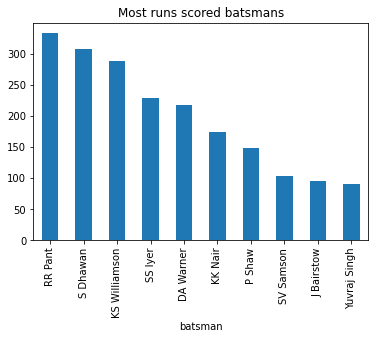

In [12]:
sub_data[sub_data['season']>2015].groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10).plot.bar(title='Most runs scored batsmans')

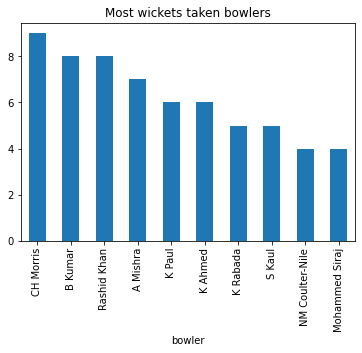

In [13]:
sub_data[sub_data['season']>2015].groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(10).plot.bar(title='Most wickets taken bowlers')

### How many balls more/less will DC take to score 20 runs from after they reach a team total of 30 as compared to SRH??

In [14]:
def Count(df):
    balls = 0
    runs = 0
    for i in df.total_runs:
        if runs <= 30:
            runs += i
        elif runs > 30 and runs <= 50:
            balls += 1
            runs += 1
        elif runs >50:
            break
    return balls

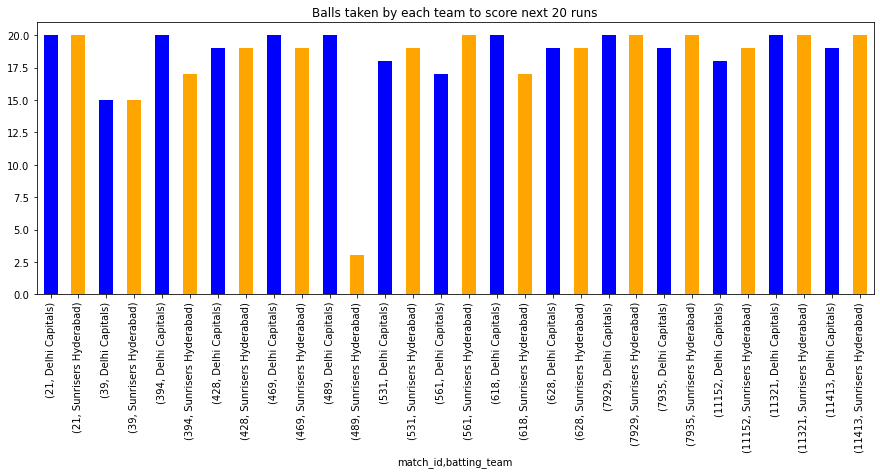

In [15]:
sub_data.groupby(['match_id', 'batting_team']).apply(Count).plot.bar(title='Balls taken by each team to score next 20 runs',color=['Blue', 'Orange'], figsize=(15,5))

In [16]:
sub_data.groupby(['match_id', 'batting_team']).apply(Count).groupby('batting_team').describe()

,count,mean,std,min,25%,50%,75%,max
batting_team,,,,,,,,
Delhi Capitals,15.0,18.933333,1.437591,15.0,18.5,19.0,20.0,20.0
Sunrisers Hyderabad,15.0,17.800000,4.345770,3.0,18.0,19.0,20.0,20.0


### How many runs will David Warner score in his last 7 balls??

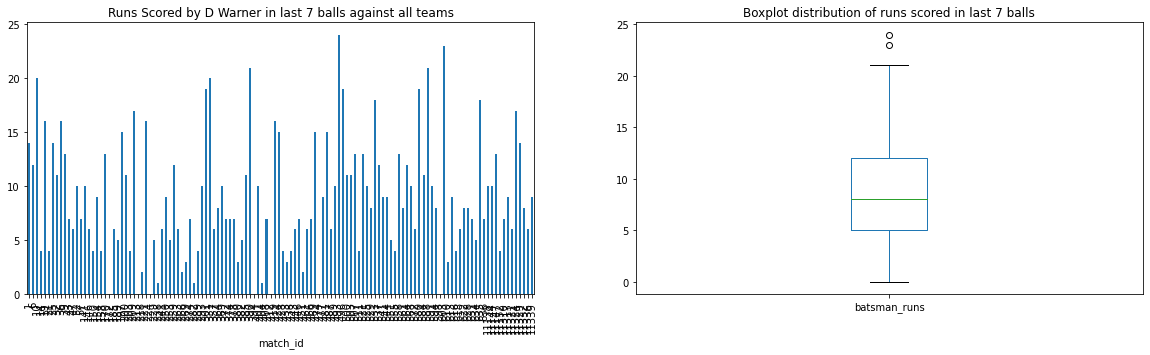

In [46]:
plt.subplot(1, 2, 1)
data[data['batsman']=='DA Warner'].groupby(['match_id']).tail(7).groupby(['match_id']).agg({'ball' : 'count', 'batsman_runs' : 'sum'})['batsman_runs'].plot.bar(title='Runs Scored by D Warner in last 7 balls against all teams', figsize=(20, 5))

plt.subplot(1, 2, 2)
data[data['batsman']=='DA Warner'].groupby(['match_id']).tail(7).groupby(['match_id']).agg({'ball' : 'count', 'batsman_runs' : 'sum'})['batsman_runs'].plot.box(title='Boxplot distribution of runs scored in last 7 balls')

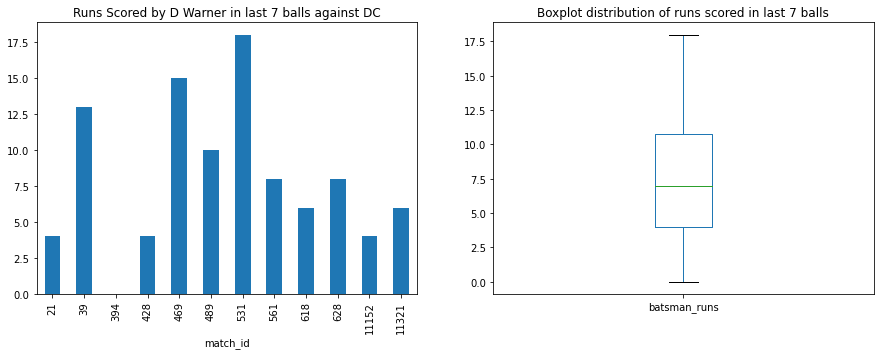

In [43]:
plt.subplot(1, 2, 1)
sub_data[sub_data['batsman']=='DA Warner'].groupby(['match_id']).tail(7).groupby(['match_id']).agg({'ball' : 'count', 'batsman_runs' : 'sum'})['batsman_runs'].plot.bar(title='Runs Scored by D Warner in last 7 balls against DC', figsize=(15, 5))

plt.subplot(1, 2, 2)
sub_data[sub_data['batsman']=='DA Warner'].groupby(['match_id']).tail(7).groupby(['match_id']).agg({'ball' : 'count', 'batsman_runs' : 'sum'})['batsman_runs'].plot.box(title='Boxplot distribution of runs scored in last 7 balls')

In [48]:
sub_data[sub_data['batsman']=='DA Warner'].groupby('match_id').tail(7).groupby('match_id')['over'].unique()

match_id
21             [1, 2]
39          [4, 5, 6]
394               [1]
428      [10, 11, 12]
469          [19, 20]
489         [3, 4, 5]
531            [6, 7]
561         [3, 4, 5]
618            [8, 9]
628      [14, 15, 16]
11152          [7, 8]
11321    [15, 16, 17]
Name: over, dtype: object

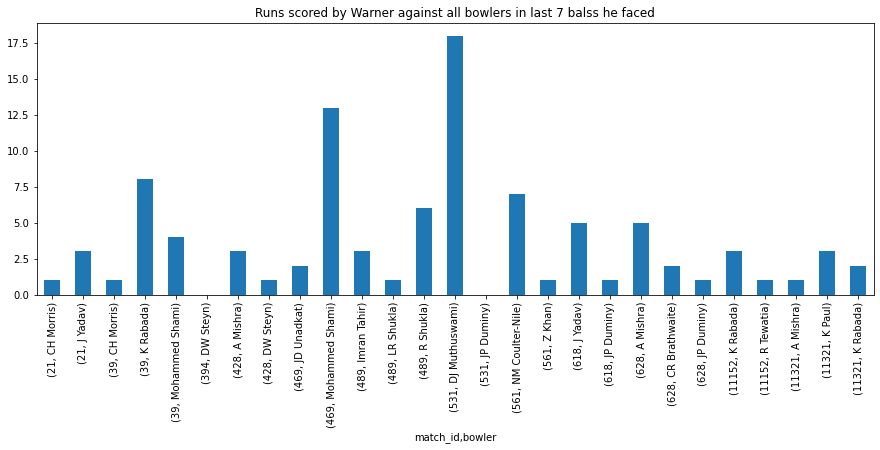

In [52]:
sub_data[sub_data['batsman']=='DA Warner'].groupby('match_id').tail(7).groupby(['match_id', 'bowler'])['batsman_runs'].sum().plot.bar(title='Runs scored by Warner against all bowlers in last 7 balss he faced', figsize=(15, 5))

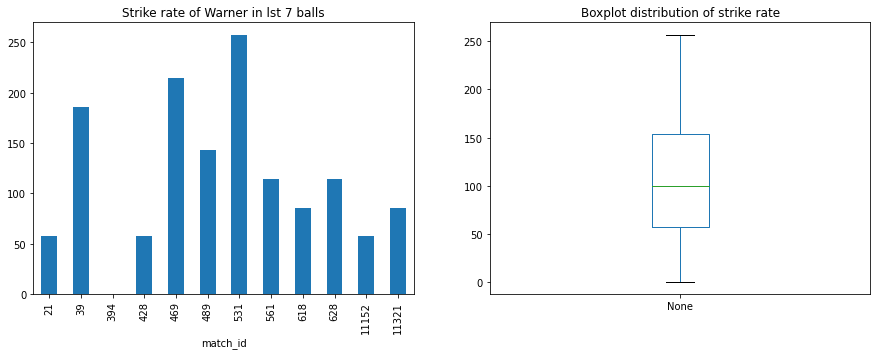

In [56]:
plt.subplot(1, 2, 1)
((sub_data[sub_data['batsman']=='DA Warner'].groupby('match_id').tail(7).groupby(['match_id'])['batsman_runs'].sum()/sub_data[sub_data['batsman']=='DA Warner'].groupby('match_id').tail(7).groupby(['match_id'])['ball'].count())*100).plot.bar(title='Strike rate of Warner in lst 7 balls', figsize=(15,5))

plt.subplot(1, 2, 2)
((sub_data[sub_data['batsman']=='DA Warner'].groupby('match_id').tail(7).groupby(['match_id'])['batsman_runs'].sum()/sub_data[sub_data['batsman']=='DA Warner'].groupby('match_id').tail(7).groupby(['match_id'])['ball'].count())*100).plot.box(title='Boxplot distribution of strike rate')

### Which batsman will score most boundaries in the match??

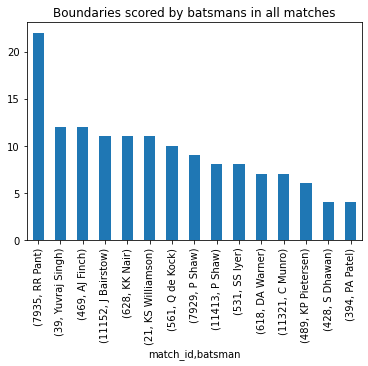

In [70]:
sub_data[sub_data['batsman_runs'].isin([4, 5, 6, 7])].groupby(['match_id', 'batsman'])['batsman_runs'].count().sort_values(ascending=False).groupby(['match_id']).head(1).plot.bar(title='Boundaries scored by batsmans in all matches')

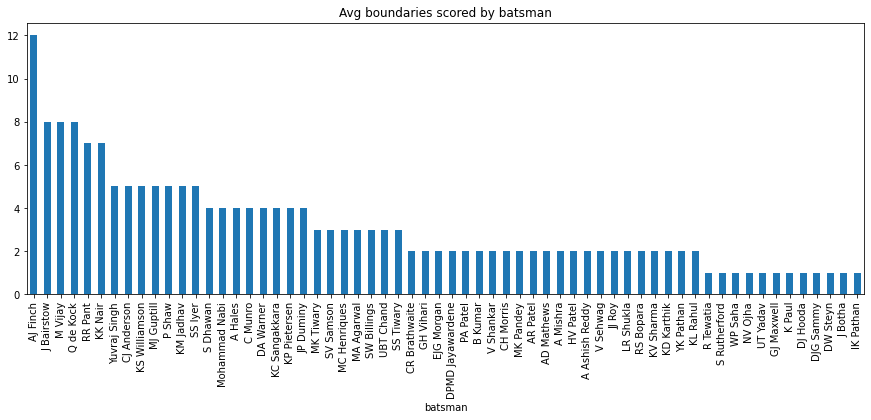

In [84]:
round(sub_data[sub_data['batsman_runs'].isin([4, 5, 6, 7])].groupby(['match_id', 'batsman'])['batsman_runs'].count().groupby('batsman').mean()).sort_values(ascending=False).plot.bar(title='Avg boundaries scored by batsman', figsize=(15,5))

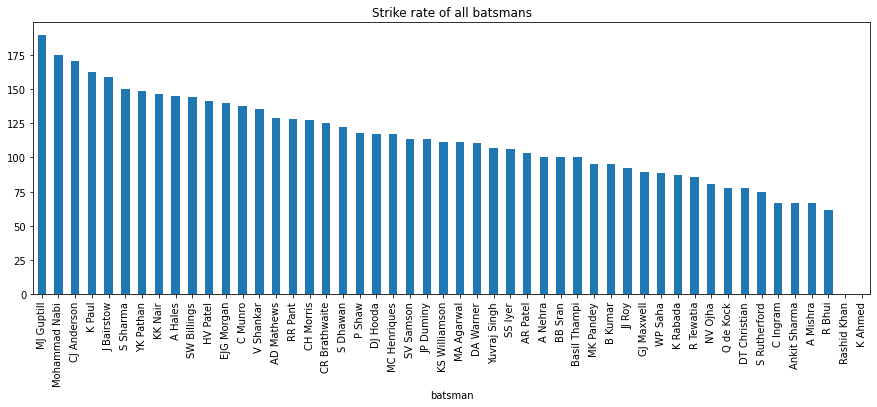

In [83]:
(((sub_data[sub_data['season']>2015].groupby(['match_id', 'batsman'])['batsman_runs'].sum() / sub_data[sub_data['season']>2015].groupby(['match_id', 'batsman'])['ball'].count()).groupby('batsman').mean())*100).sort_values(ascending=False).plot.bar(title='Strike rate of all batsmans', figsize=(15,5))

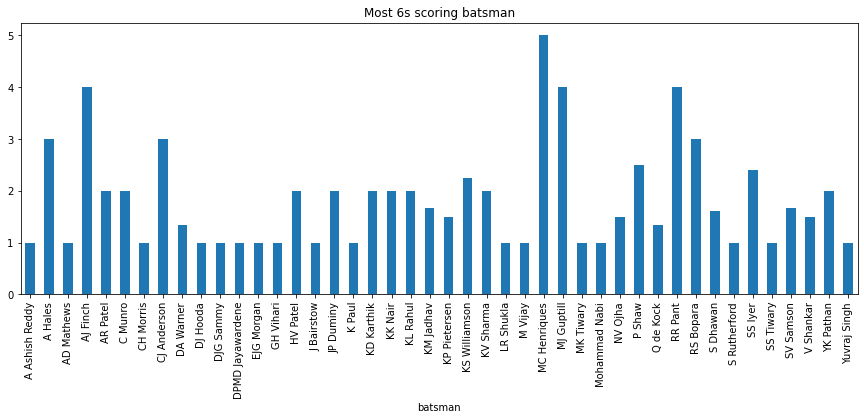

In [88]:
sub_data[sub_data['batsman_runs'].isin([6, 7])].groupby(['match_id', 'batsman'])['batsman_runs'].count().groupby('batsman').mean().plot.bar(title='Most 6s scoring batsman', figsize=(15,5))

### How many wickets will Rashid Khan take in the match??

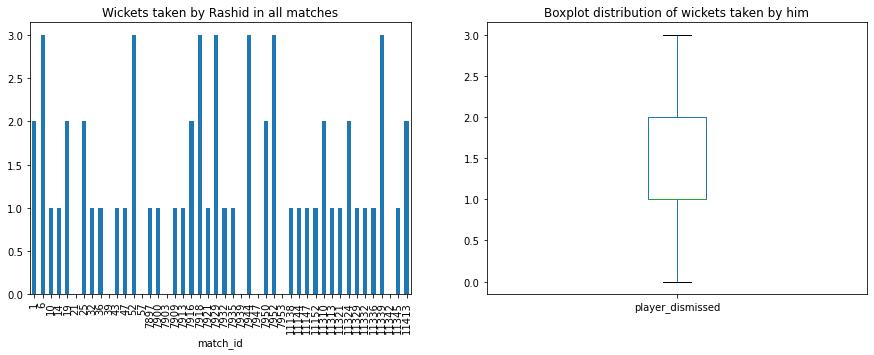

In [91]:
plt.subplot(1, 2 ,1)
data[data['bowler']=='Rashid Khan'].groupby('match_id')['player_dismissed'].count().plot.bar(title='Wickets taken by Rashid in all matches', figsize=(15 ,5))

plt.subplot(1, 2 ,2)
data[data['bowler']=='Rashid Khan'].groupby('match_id')['player_dismissed'].count().plot.box(title='Boxplot distribution of wickets taken by him')

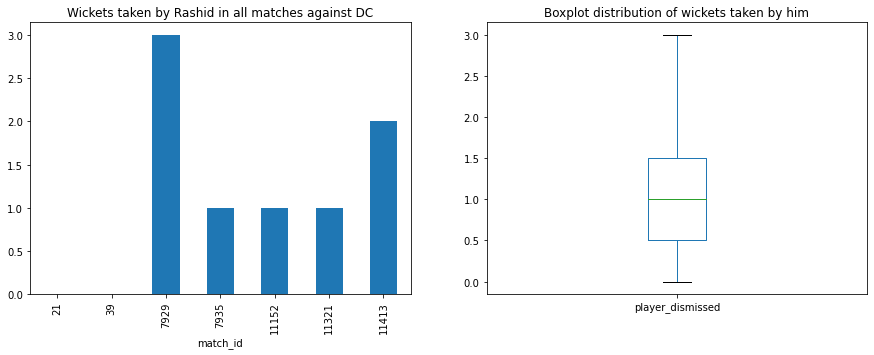

In [92]:
plt.subplot(1, 2 ,1)
sub_data[sub_data['bowler']=='Rashid Khan'].groupby('match_id')['player_dismissed'].count().plot.bar(title='Wickets taken by Rashid in all matches against DC', figsize=(15 ,5))

plt.subplot(1, 2 ,2)
sub_data[sub_data['bowler']=='Rashid Khan'].groupby('match_id')['player_dismissed'].count().plot.box(title='Boxplot distribution of wickets taken by him')